# Covid-19: finding the most reliable papers 

### Intro

We are a group of engineers at Atos/Bull.

### Goals

Our goal was to **overcomes the problem of finding relevant papers** about a given query. We argue mainly people have developed great tools to search the closest sentences in the papers datasets, but that the closest matching sentences doesn't mean necessarly the most reliable. There is many papers coming out about covid-19 recently. How can you find the most useful ones to a specific query ?

### How it works 

We have develop a search engine for engine for getting the opinions of the scientific community on a task/query. A use case can be found [here](https://www.kaggle.com/mrmimic/risk-factors-analysis-by-opinion-finding).

We believe this tool can be combine with a paper ranking system to point out the most relevant papers for each opinion about a question. We therefore show in this notebook that papers got many citations linking to each other. Therefore a citation network can be build on to pointed out the most important papers ( similar to Google PageRank algorithm).

### Side note
The current  notebook is a proof of concept showing: **A citation network can be leverage for raking papers.** Further works will be done on it soon. 

## Imports and install our lib

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import choice

In [11]:
!pip install --upgrade --no-deps --force-reinstall -q git+https://github.com/MrMimic/covid-19-kaggle

In [12]:
from c19 import networkx_utilities

# Load our citation graph

**We build up a citation graph that anyone can loaded easily using our lib**

In [13]:
G = networkx_utilities.get_citations_graph()

loading citation graph... 
Graph loaded is having 1271832 nodes and 2274146 edges


In [14]:
# get number of time a paper was cite by others and number of its own citations
title = "interferon-stimulated gene 15 conjugation stimulates hepatitis b virus production independent of type i interferon signaling pathway in vitro"
print(f"The paper <<{title}>> \n is cited {G.in_degree[title]} times. Its annexe contain {G.out_degree[title]} references.")

The paper <<interferon-stimulated gene 15 conjugation stimulates hepatitis b virus production independent of type i interferon signaling pathway in vitro>> 
 is cited 2 times. Its annexe contain 45 references.


# Display citation graph of a single paper

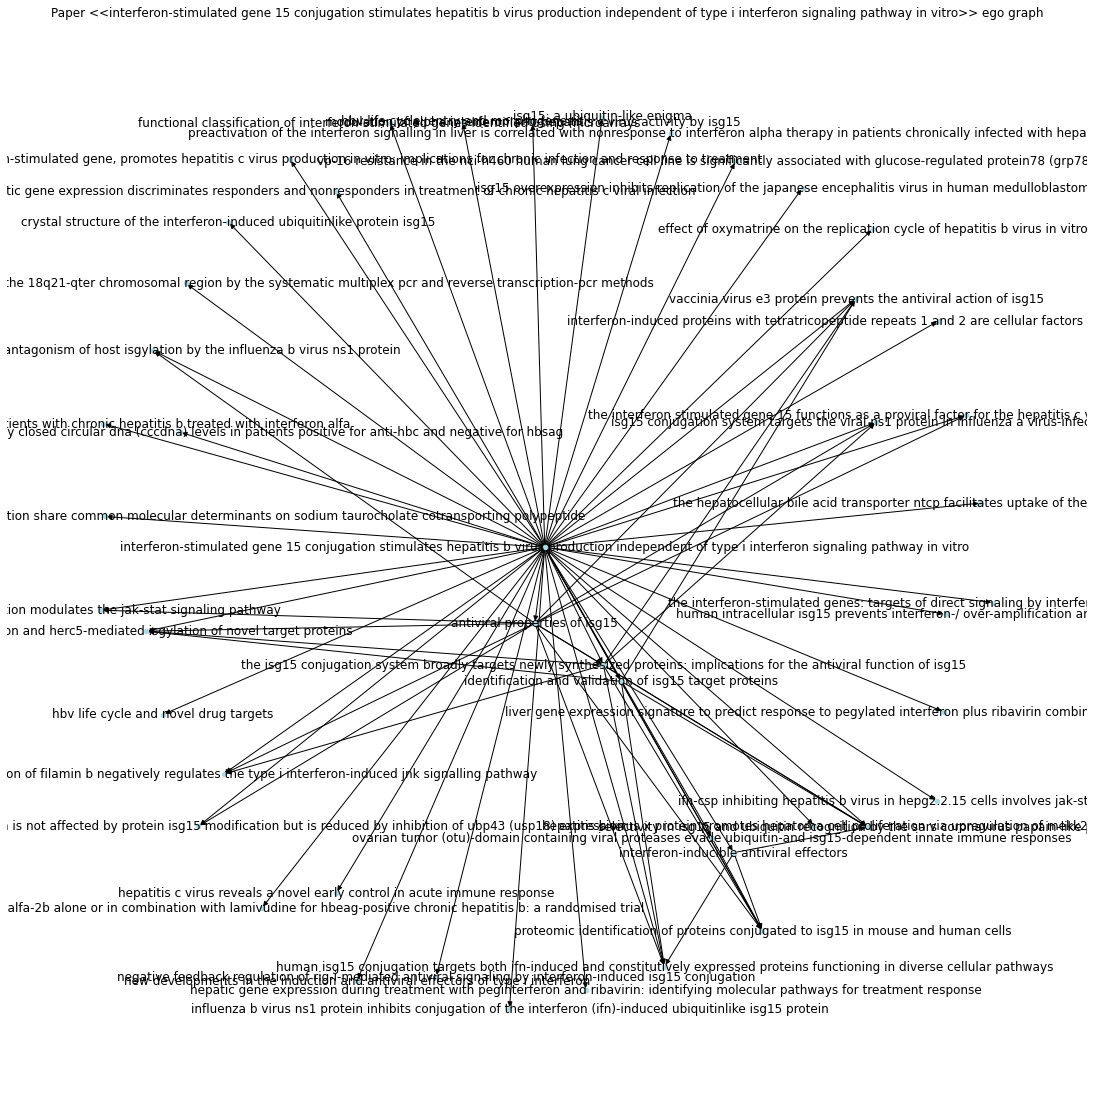

In [15]:
H= nx.ego_graph(G, title, radius=1)
size = 15
plt.figure(figsize = [size,size]) 
pos = nx.spring_layout(H) 
nx.draw(H, with_labels=True, node_size = 20 , node_color = 'lightblue')
plt.title(f'Paper <<{title}>> ego graph')
plt.savefig('cite.png')

# Subgraph display

We use a subset of the full graph for display , too avoid unreadable spaghettis plots

In [16]:
graph_size = 20000
Gsub = G.subgraph(list(G.nodes)[0:graph_size])
print(f"Graph loaded is having {len(list(Gsub.nodes))} nodes and {len(list(Gsub.edges))} edges")

Graph loaded is having 20000 nodes and 34782 edges


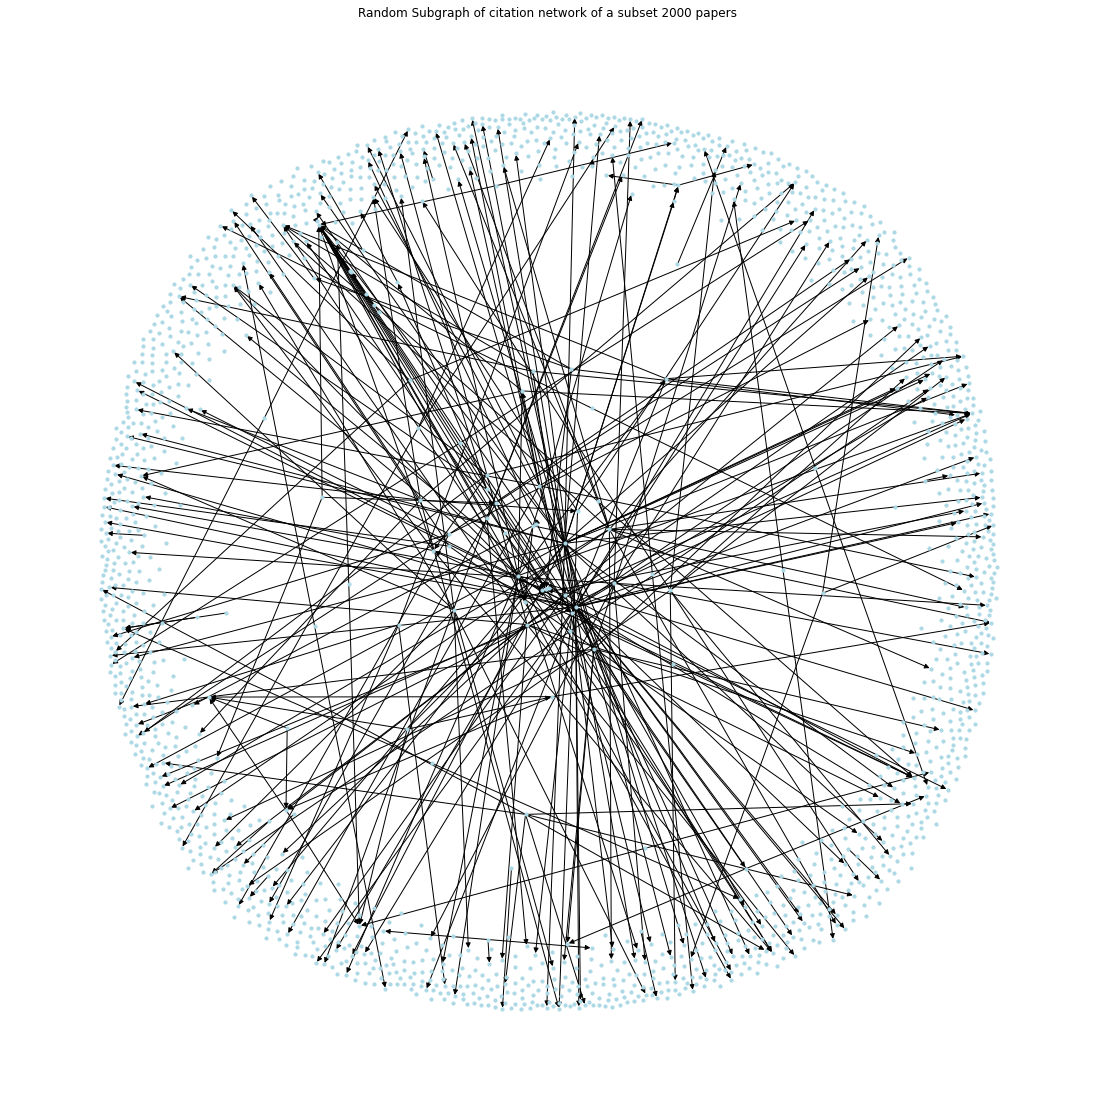

In [17]:
max_nodes=2000
H= Gsub.subgraph(random.sample(list(Gsub.nodes), max_nodes))
plt.figure(figsize = [15,15]) 
pos = nx.spring_layout(H) 
nx.draw(H, with_labels=False, node_size = 10 , node_color = 'lightblue')
plt.title(f'Random Subgraph of citation network of a subset {max_nodes} papers')
plt.savefig('cite.png')

# Most cited papers graph

In [18]:
N = 40
G_most_cited = networkx_utilities.get_paper_cited_K_times_graph(Gsub, N)

nan
isolation and characterization of viruses related to the sars coronavirus from animals in southern china
bats are natural reservoirs of sars-like coronaviruses
unique and conserved features of genome and proteome of sars-coronavirus, an early split-off from the coronavirus group 2 lineage
characterization and complete genome sequence of a novel coronavirus, coronavirus hku1, from patients with pneumonia
characterization of a novel coronavirus associated with severe acute respiratory syndrome
severe acute respiratory syndrome coronavirus-like virus in chinese horseshoe bats
genomic characterization of a newly discovered coronavirus associated with acute respiratory distress syndrome in humans
angiotensin-converting enzyme 2 is a functional receptor for the sars coronavirus
identification of a novel coronavirus in patients with severe acute respiratory syndrome
dipeptidyl peptidase 4 is a functional receptor for the emerging human coronavirus-emc
a novel coronavirus associated with s

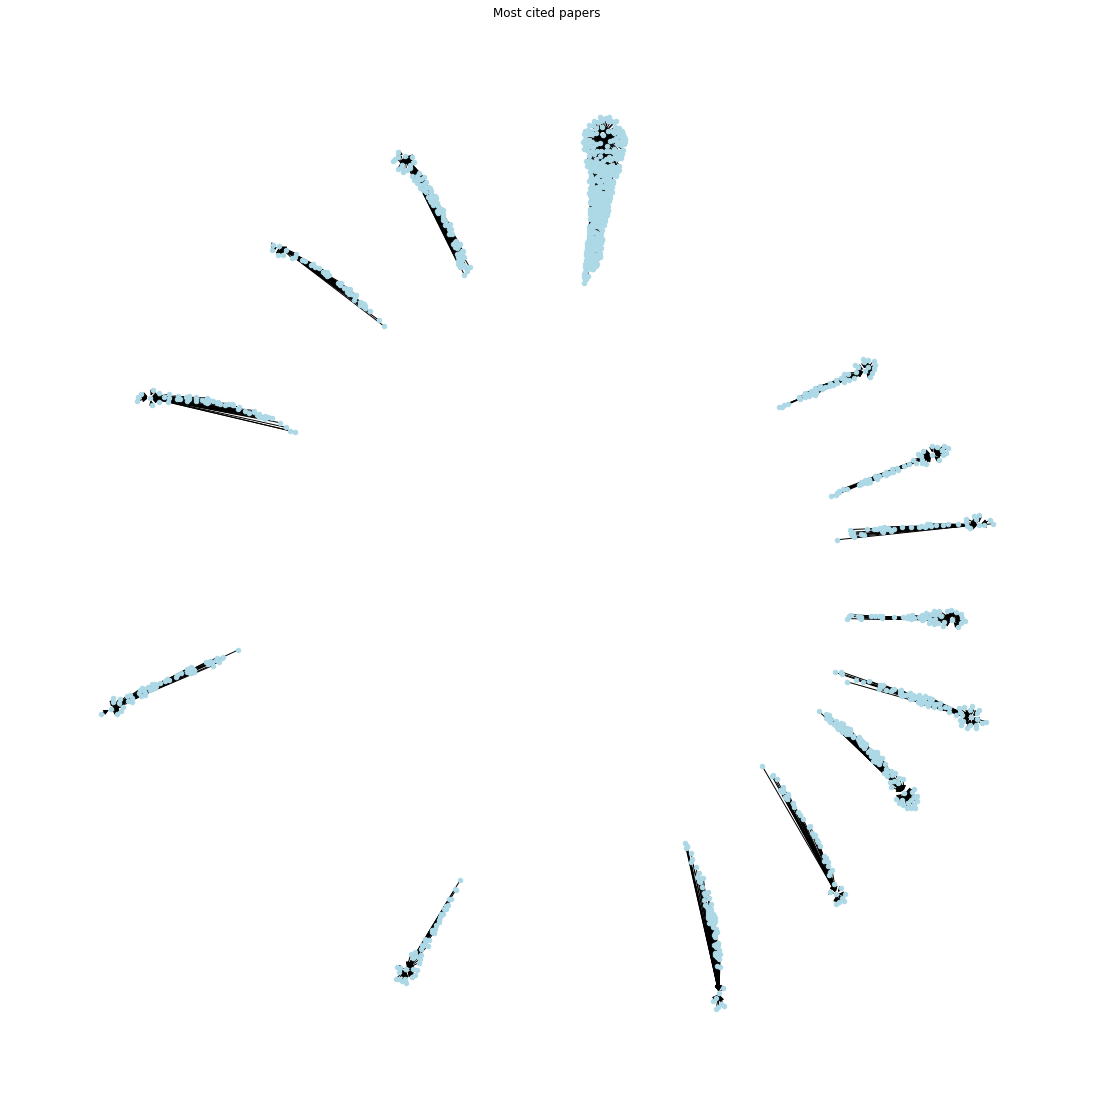

In [19]:
size = 15
plt.figure(figsize = [size,size]) 
pos = nx.spring_layout(H) 
nx.draw(G_most_cited, with_labels=False, node_size = 20 , node_color = 'lightblue')
plt.title(f'Most cited papers')
plt.savefig('most_cited.png')

We see here some papers seems much more central than some others. We believe this should be used by the scientific community.